In [53]:

import argparse
import glob
import itertools
import json
import os
import sys
import time

from datetime import datetime
import matplotlib as mpl
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

from astropy.time import Time
from astropy.io import ascii

from astropy.visualization import time_support
time_support()
from astropy.visualization import quantity_support
quantity_support()

#from scipy.interpolate import make_interp_spline as spline

## set plot style
plt.style.use("seaborn-colorblind")
mpl.rcParams.update({"axes.grid" : True})
plt.style.context(("seaborn-colorblind",));
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

In [6]:
os.getcwd()

'/mnt/c/Users/Tyler/Documents/GitHub/nmma_fitter/msiStats'

In [67]:
with open('ztf_observation_log.json','r') as f:
    data = json.load(f)['Entries']
data= pd.DataFrame(data)
df = data.drop(data.index[0]).reset_index(drop=True)

df.loc[:, 'Date1'] = (df.Date.map(lambda x: x[0])).astype(np.datetime64)
df.loc[:, 'Date2'] = (df.Date.map(lambda x: x[1])).astype(np.datetime64)
df.loc[:, 'Date'] = (df.Date.map(lambda x: x[0])).astype(np.datetime64)

df['datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df[df['Date'] > '2021-05-31'].reset_index(drop=True)
#df['Date'] = pd.to_datetime(df['Date']).astype(np.datetime64)
display(df.head())
print(df.dtypes)
#df.set_index('Date', inplace=True)
df2 = df.set_index('datetime')
display(df2.head())
print(df2.dtypes)

,Name,IssueType,Date,Weather,Observed,Removed,Notes,DataToIPAC,IssueCuts,Date1,Date2,datetime
0,Entry,instrument,2021-08-04,None,False,False,Thermal runaway,False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-04,NaT,2021-08-04
1,Entry,instrument,2021-08-06,None,False,False,"Dome never opened, telescope not initialized",False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-06,NaT,2021-08-06
2,Entry,maintenance,2021-08-10,None,True,False,P48 observing floor clean-up/look over on cryo...,True,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-10,NaT,2021-08-10
3,Entry,maintenance,2021-08-25,None,True,False,Corrector cleaning,True,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-25,NaT,2021-08-25
4,Entry,instrument,2021-09-28,None,False,False,Shutter problems; Corrector cleaning,False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-09-28,2021-09-29,2021-09-28


Name                  object
IssueType             object
Date          datetime64[ns]
Weather               object
Observed              object
Removed               object
Notes                 object
DataToIPAC            object
IssueCuts             object
Date1         datetime64[ns]
Date2         datetime64[ns]
datetime      datetime64[ns]
dtype: object


,Name,IssueType,Date,Weather,Observed,Removed,Notes,DataToIPAC,IssueCuts,Date1,Date2
datetime,,,,,,,,,,,
2021-08-04,Entry,instrument,2021-08-04,None,False,False,Thermal runaway,False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-04,NaT
2021-08-06,Entry,instrument,2021-08-06,None,False,False,"Dome never opened, telescope not initialized",False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-06,NaT
2021-08-10,Entry,maintenance,2021-08-10,None,True,False,P48 observing floor clean-up/look over on cryo...,True,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-10,NaT
2021-08-25,Entry,maintenance,2021-08-25,None,True,False,Corrector cleaning,True,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-08-25,NaT
2021-09-28,Entry,instrument,2021-09-28,None,False,False,Shutter problems; Corrector cleaning,False,"{'RCid': {}, 'Filter': {}, 'Other': {}}",2021-09-28,2021-09-29


Name                  object
IssueType             object
Date          datetime64[ns]
Weather               object
Observed              object
Removed               object
Notes                 object
DataToIPAC            object
IssueCuts             object
Date1         datetime64[ns]
Date2         datetime64[ns]
dtype: object


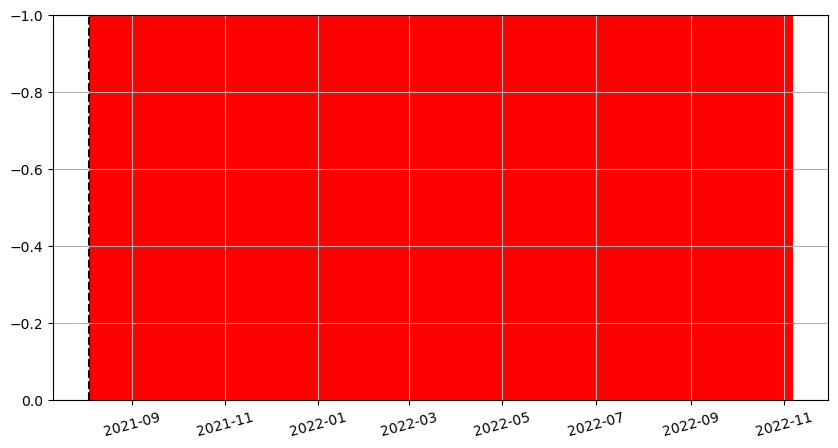

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))
# plot = sns.barplot(data=df, x='Date1', y=df['Observed']-1, 
#             color='white',ax=ax)
# for ind, label in enumerate(ax.get_xticklabels()):
#     if ind % 13 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
ax.axvspan(df2['Date1'].to_numpy()[0], df2['Date1'].to_numpy()[-1], facecolor='red', alpha=1,zorder=0)
ax.axvline(df2['Date1'][0], color='black', linestyle='--',zorder=1)



# fig, ax = plt.subplots(figsize=(10, 5))
# for idx, row in df2.iterrows():
#     if not row['Observed']:
#         if not np.isnat(datetime(row['Date2'])):
#             print(row['Date1'],'\n',row['Date2'])
#             ax.axvspan(row['Date1'], row['Date2'], facecolor='black', alpha=1)
#     else:
#         continue
ax.set_ylim(0, -1)
plt.xticks(rotation=15)
#ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.show();

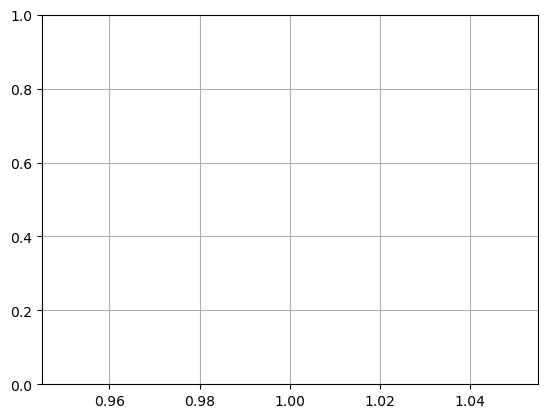

In [27]:
plt.axvspan(1, np.nan)